In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import streamlit as st

In [2]:
df = pd.read_html('https://fbref.com/tiny/6eemg',
                  attrs ={"id":"standard_stats"})[0]

In [3]:
df.columns = ['_'.join(col).strip() if isinstance(col, tuple) else col for col in df.columns]

# Bazı sütun adları örneğin şu hale gelecek:
# 'Unnamed: 0_level_0_Player' → 'Player'
# 'Playing Time_MP' → 'MP'

# İsteğe göre bazılarını yeniden adlandırabilirsin:
df.rename(columns={
    'Unnamed: 0_level_0_Player': 'Player',
    'Unnamed: 1_level_0_Span': 'Year',
    'Unnamed: 2_level_0_Nation': 'Nation',
    'Unnamed: 3_level_0_Pos': 'Position',
    'Playing Time_MP': 'MP',
    'Performance_Gls': 'Goals',
    'Playing Time_Min': 'Minutes',
    'Unnamed: 4_level_0_Squad': 'Squad'
}, inplace=True)

In [4]:
df.head()

,Player,Year,Nation,Position,Squad,MP,Playing Time_Starts,Minutes,Playing Time_90s,Goals,...,Per 90 Minutes_Gls,Per 90 Minutes_Ast,Per 90 Minutes_G+A,Per 90 Minutes_G-PK,Per 90 Minutes_G+A-PK,Per 90 Minutes_xG,Per 90 Minutes_xAG,Per 90 Minutes_xG+xAG,Per 90 Minutes_npxG,Per 90 Minutes_npxG+xAG
0,Mohamed Salah,2024-25,eg EGY,FW,Liverpool,38,38,3371,37.5,29,...,0.77,0.48,1.25,0.53,1.01,0.67,0.38,1.05,0.49,0.87
1,Alexander Isak,2024-25,se SWE,FW,Newcastle Utd,34,34,2756,30.6,23,...,0.75,0.20,0.95,0.62,0.82,0.66,0.14,0.81,0.56,0.70
2,Erling Haaland,2024-25,no NOR,FW,Manchester City,31,31,2736,30.4,22,...,0.72,0.10,0.82,0.62,0.72,0.72,0.10,0.82,0.62,0.72
3,Chris Wood,2024-25,nz NZL,FW,Nott'ham Forest,36,35,2959,32.9,20,...,0.61,0.09,0.70,0.52,0.61,0.41,0.08,0.49,0.34,0.42
4,Bryan Mbeumo,2024-25,cm CMR,FW,Brentford,38,38,3414,37.9,20,...,0.53,0.18,0.71,0.40,0.58,0.32,0.22,0.54,0.20,0.42


In [13]:
# Diyelim veri DataFrame'inde df adlı değişkende var
df.to_csv("premier_league_2024_25.csv", index=False)


C:\Users\erens\AppData\Local\Temp\ipykernel_8980\1631699594.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x='Goals', y='Player', palette='rocket')


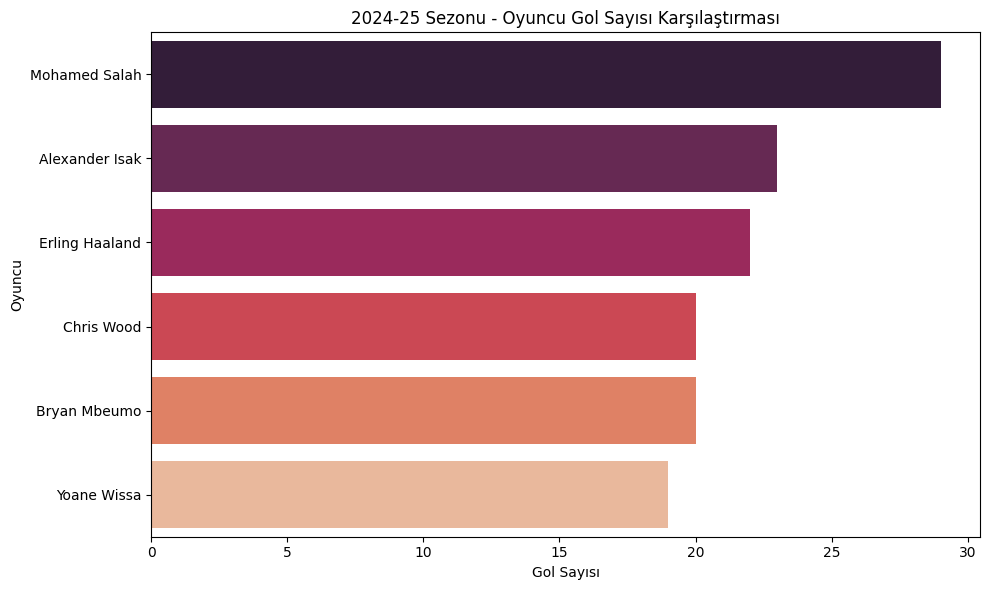

In [5]:
plt.figure(figsize=(10, 6))
sns.barplot(data=df, x='Goals', y='Player', palette='rocket')
plt.title('2024-25 Sezonu - Oyuncu Gol Sayısı Karşılaştırması')
plt.xlabel('Gol Sayısı')
plt.ylabel('Oyuncu')
plt.tight_layout()
plt.show()

C:\Users\erens\AppData\Local\Temp\ipykernel_8980\1404556858.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x='Per 90 Minutes_Gls', y='Player', palette='viridis')


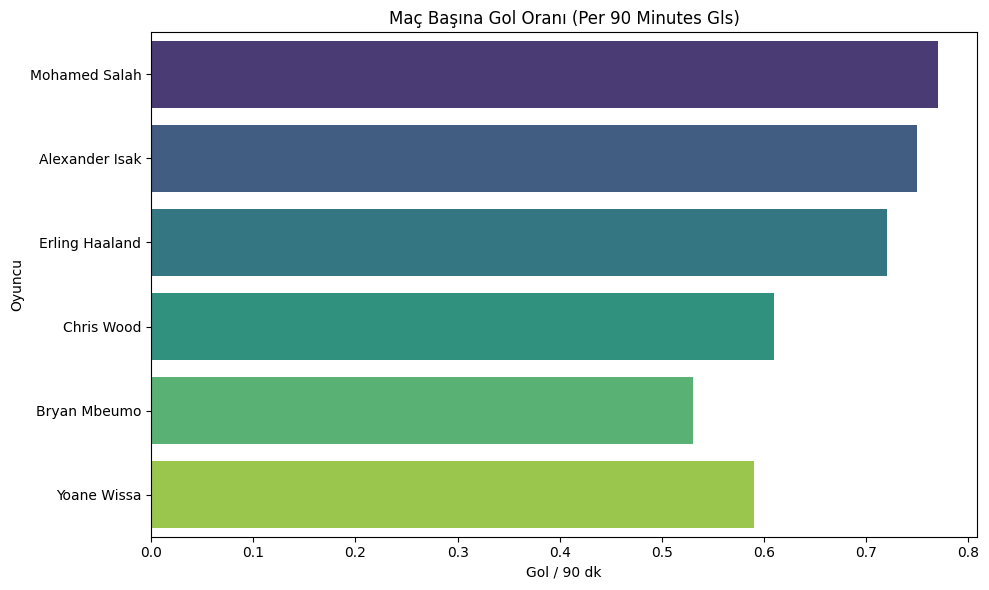

In [6]:
plt.figure(figsize=(10, 6))
sns.barplot(data=df, x='Per 90 Minutes_Gls', y='Player', palette='viridis')
plt.title('Maç Başına Gol Oranı (Per 90 Minutes Gls)')
plt.xlabel('Gol / 90 dk')
plt.ylabel('Oyuncu')
plt.tight_layout()
plt.show()


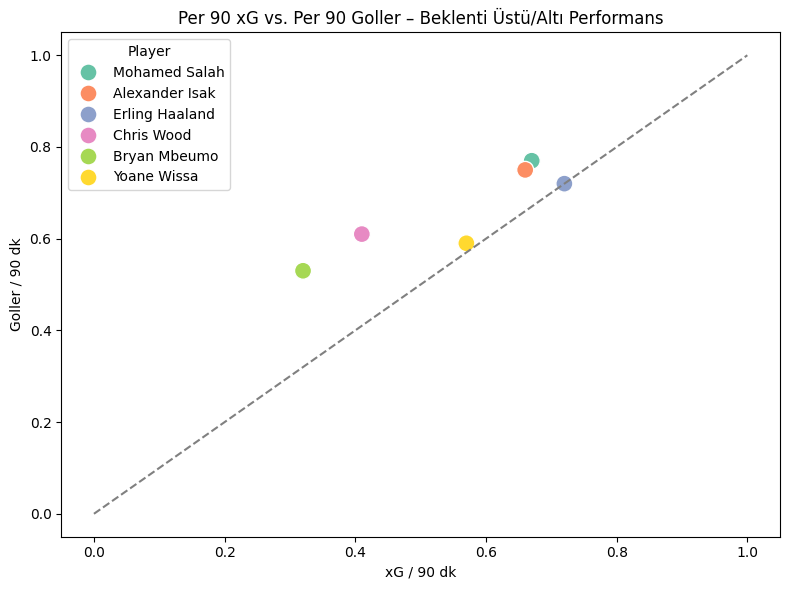

In [7]:
plt.figure(figsize=(8, 6))
sns.scatterplot(
    data=df,
    x='Per 90 Minutes_xG',
    y='Per 90 Minutes_Gls',
    hue='Player',
    s=150,
    palette='Set2'
)
plt.plot([0, 1], [0, 1], '--', color='gray')  # eşitlik çizgisi
plt.title('Per 90 xG vs. Per 90 Goller – Beklenti Üstü/Altı Performans')
plt.xlabel('xG / 90 dk')
plt.ylabel('Goller / 90 dk')
plt.tight_layout()
plt.show()


C:\Users\erens\AppData\Local\Temp\ipykernel_8980\2155034519.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x='Per 90 Minutes_G+A', y='Player', palette='magma')


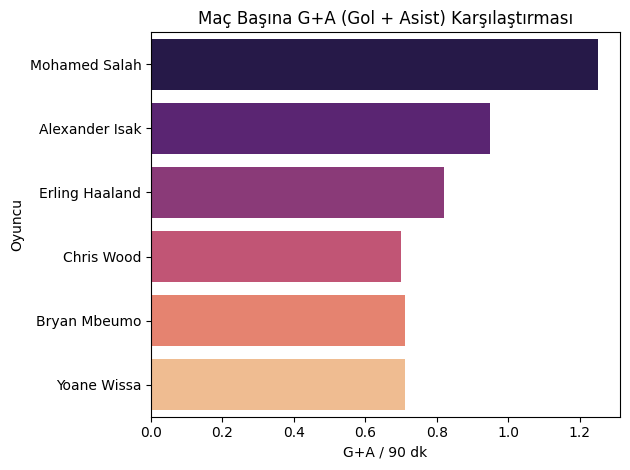

In [8]:
sns.barplot(data=df, x='Per 90 Minutes_G+A', y='Player', palette='magma')
plt.title('Maç Başına G+A (Gol + Asist) Karşılaştırması')
plt.xlabel('G+A / 90 dk')
plt.ylabel('Oyuncu')
plt.tight_layout()
plt.show()


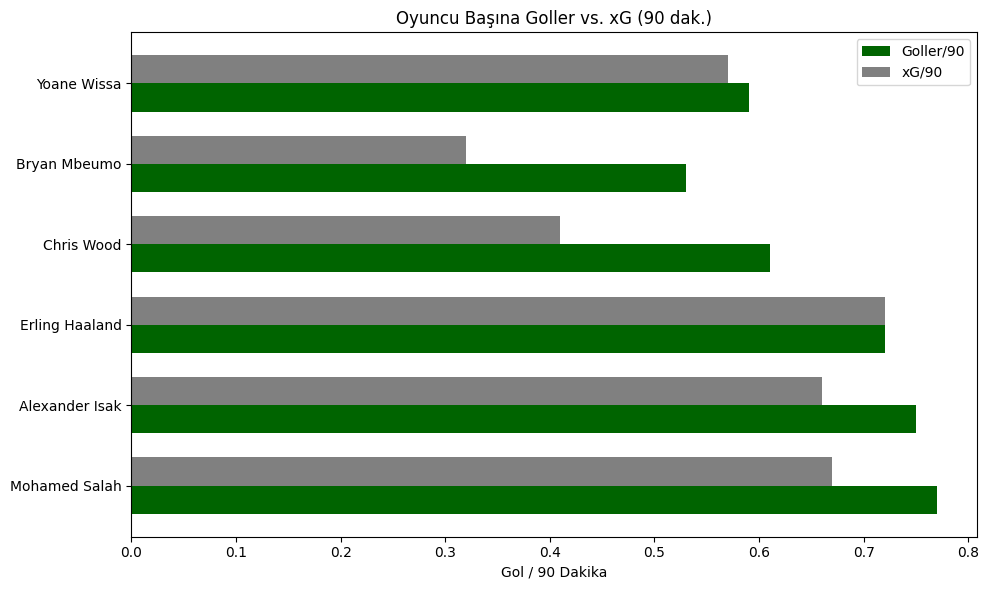

In [9]:
import matplotlib.pyplot as plt

players = df['Player']
goals = df['Per 90 Minutes_Gls']
xg = df['Per 90 Minutes_xG']

plt.figure(figsize=(10, 6))
bar_width = 0.35
indices = range(len(players))

plt.barh(indices, goals, bar_width, label='Goller/90', color='darkgreen')
plt.barh([i + bar_width for i in indices], xg, bar_width, label='xG/90', color='gray')

plt.yticks([i + bar_width / 2 for i in indices], players)
plt.xlabel('Gol / 90 Dakika')
plt.title('Oyuncu Başına Goller vs. xG (90 dak.)')
plt.legend()
plt.tight_layout()
plt.show()


Bu grafik, oyuncuların ne kadar bitirici olduğunu gösterir.

Eğer oyuncunun gol barı, xG barından yüksekse, oyuncu beklentinin üzerinde gol atıyor.

Tam tersi durumda, pozisyonları gole çevirmekte zorlanıyor olabilir.

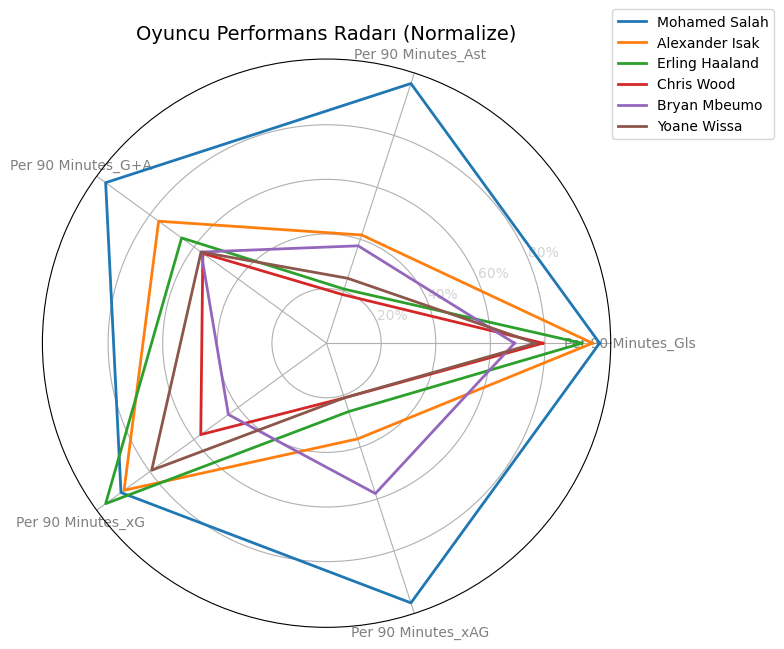

In [10]:
from math import pi
import pandas as pd
import matplotlib.pyplot as plt

# Radar chart için normalize edilmiş veri hazırlığı
metrics = [
    'Per 90 Minutes_Gls', 
    'Per 90 Minutes_Ast', 
    'Per 90 Minutes_G+A',
    'Per 90 Minutes_xG', 
    'Per 90 Minutes_xAG'
]

df_radar = df.set_index('Player')[metrics]
df_radar = df_radar.div(df_radar.max())  # normalize et

# Radar çizimi
labels = metrics
num_vars = len(labels)

angles = [n / float(num_vars) * 2 * pi for n in range(num_vars)]
angles += angles[:1]  # loop back to start

plt.figure(figsize=(8, 8))

for player in df_radar.index:
    values = df_radar.loc[player].tolist()
    values += values[:1]
    plt.polar(angles, values, label=player, linewidth=2)

plt.xticks(angles[:-1], labels, color='gray')
plt.yticks([0.2, 0.4, 0.6, 0.8], ["20%", "40%", "60%", "80%"], color="lightgray")
plt.title('Oyuncu Performans Radarı (Normalize)', size=14)
plt.legend(loc='upper right', bbox_to_anchor=(1.3, 1.1))
plt.tight_layout()
plt.show()


Bu grafik oyuncuların hangi alanlarda öne çıktığını gösterir.

Örneğin: Gol + Asist yüksek ama xG/xAG düşükse oyuncu bitiricilikle öne çıkıyor.

Radar genişliği = oyuncunun ofansif profili.

In [11]:
import plotly.express as px
import plotly.graph_objects as go

fig = go.Figure()

for idx, row in df.iterrows():
    fig.add_trace(go.Scatter(
        x=[row['Per 90 Minutes_xG'], row['Per 90 Minutes_Gls']],
        y=[row['Player'], row['Player']],
        mode='lines+markers',
        marker=dict(size=10),
        line=dict(width=3),
        name=row['Player']
    ))

fig.update_layout(
    title="Goller vs. xG (Per 90 Dakika)",
    xaxis_title="Değer",
    yaxis_title="Oyuncu",
    showlegend=False
)

fig.show()


ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

Oyuncunun çizgisi ne kadar sağa uzuyorsa, o kadar fazla xG’nin üstünde gol atmıştır.

Sol tarafta kalıyorsa, pozisyonları değerlendirmekte sorun yaşıyor olabilir.

Bu grafik “gol beklentisiyle gerçek üretkenlik” arasındaki farkı çok net gösterir.

C:\Users\erens\AppData\Local\Temp\ipykernel_17868\829625088.py:4: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




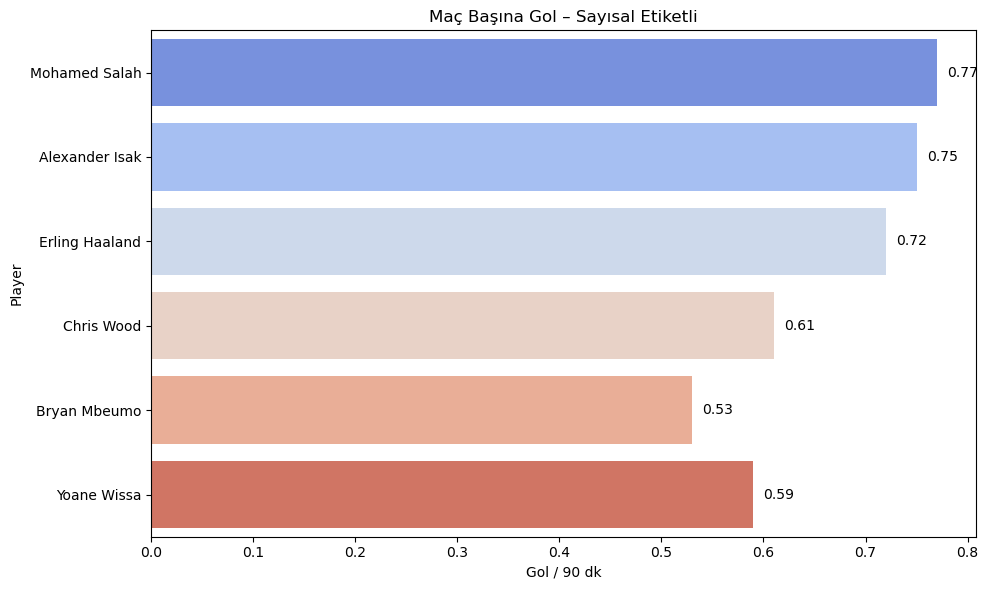

In [29]:
import seaborn as sns

plt.figure(figsize=(10, 6))
ax = sns.barplot(data=df, x='Per 90 Minutes_Gls', y='Player', palette='coolwarm')

for i, val in enumerate(df['Per 90 Minutes_Gls']):
    ax.text(val + 0.01, i, f"{val:.2f}", va='center')

plt.title('Maç Başına Gol – Sayısal Etiketli')
plt.xlabel('Gol / 90 dk')
plt.tight_layout()
plt.show()


Klasik barplot’un üstüne değer yazılarak analiz okunabilirliği artırıldı.

Profesyonel raporlarda ve sunumlarda çok kullanışlıdır.

Gölgelendirme ile oyuncular arası fark daha belirgin hale gelir.

2025-08-01 16:38:33.685 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-08-01 16:38:33.771 
  command:

    streamlit run C:\Users\erens\AppData\Roaming\Python\Python312\site-packages\ipykernel_launcher.py [ARGUMENTS]
2025-08-01 16:38:33.772 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-08-01 16:38:33.774 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-08-01 16:38:33.774 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-08-01 16:38:33.775 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-08-01 16:38:33.777 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-08-01 16:38:33.777 Thre

DeltaGenerator()

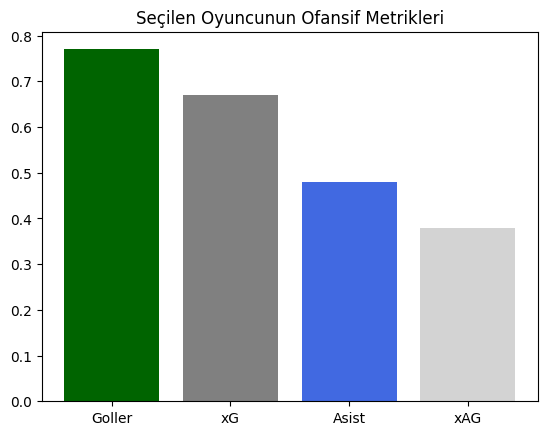

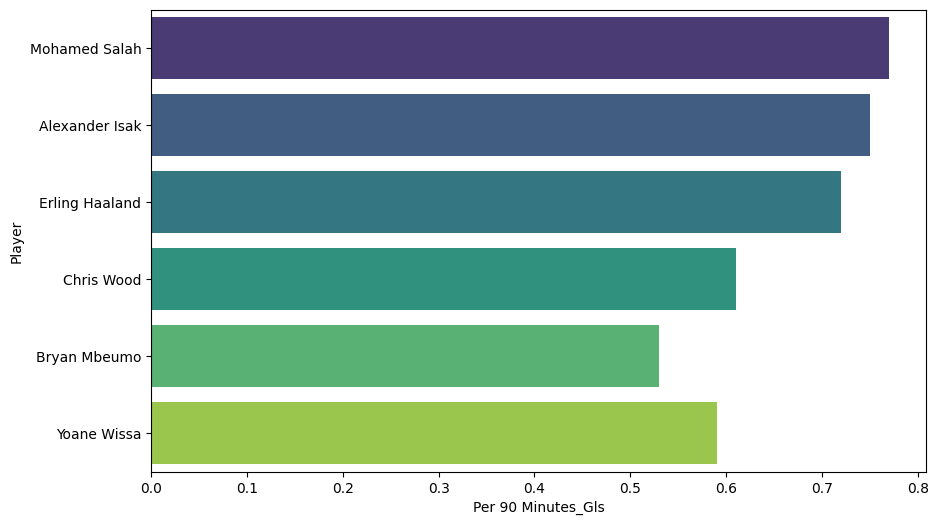

In [12]:
st.title("Premier League Gol Krallığı Analizi – 2024/25")

# Oyuncu seçimi
player = st.selectbox("Bir oyuncu seç:", df['Player'])

# Seçilen oyuncunun verisi
selected = df[df['Player'] == player].squeeze()

st.subheader(f"{player} – Performans Özeti")

st.markdown(f"""
- 🎯 Goller / 90 dk: `{selected['Per 90 Minutes_Gls']:.2f}`
- 📈 xG / 90 dk: `{selected['Per 90 Minutes_xG']:.2f}`
- 🅰️ Asistler / 90 dk: `{selected['Per 90 Minutes_Ast']:.2f}`
- ⚙️ xAG / 90 dk: `{selected['Per 90 Minutes_xAG']:.2f}`
""")

# Bar Chart
fig, ax = plt.subplots()
metrics = {
    "Goller": selected['Per 90 Minutes_Gls'],
    "xG": selected['Per 90 Minutes_xG'],
    "Asist": selected['Per 90 Minutes_Ast'],
    "xAG": selected['Per 90 Minutes_xAG']
}
ax.bar(metrics.keys(), metrics.values(), color=['darkgreen', 'gray', 'royalblue', 'lightgray'])
ax.set_title("Seçilen Oyuncunun Ofansif Metrikleri")
st.pyplot(fig)

# Tüm oyuncular için karşılaştırma (isteğe bağlı)
st.subheader("Tüm Oyuncular – Gol / 90 dk")
fig2, ax2 = plt.subplots(figsize=(10, 6))
sns.barplot(data=df, x="Per 90 Minutes_Gls", y="Player", ax=ax2, palette="viridis")
st.pyplot(fig2)